In [ ]:
 Installing MySQL on Linux Using the MySQL Yum Repository
 ===============================================================================

 https://dev.mysql.com/downloads/repo/yum/

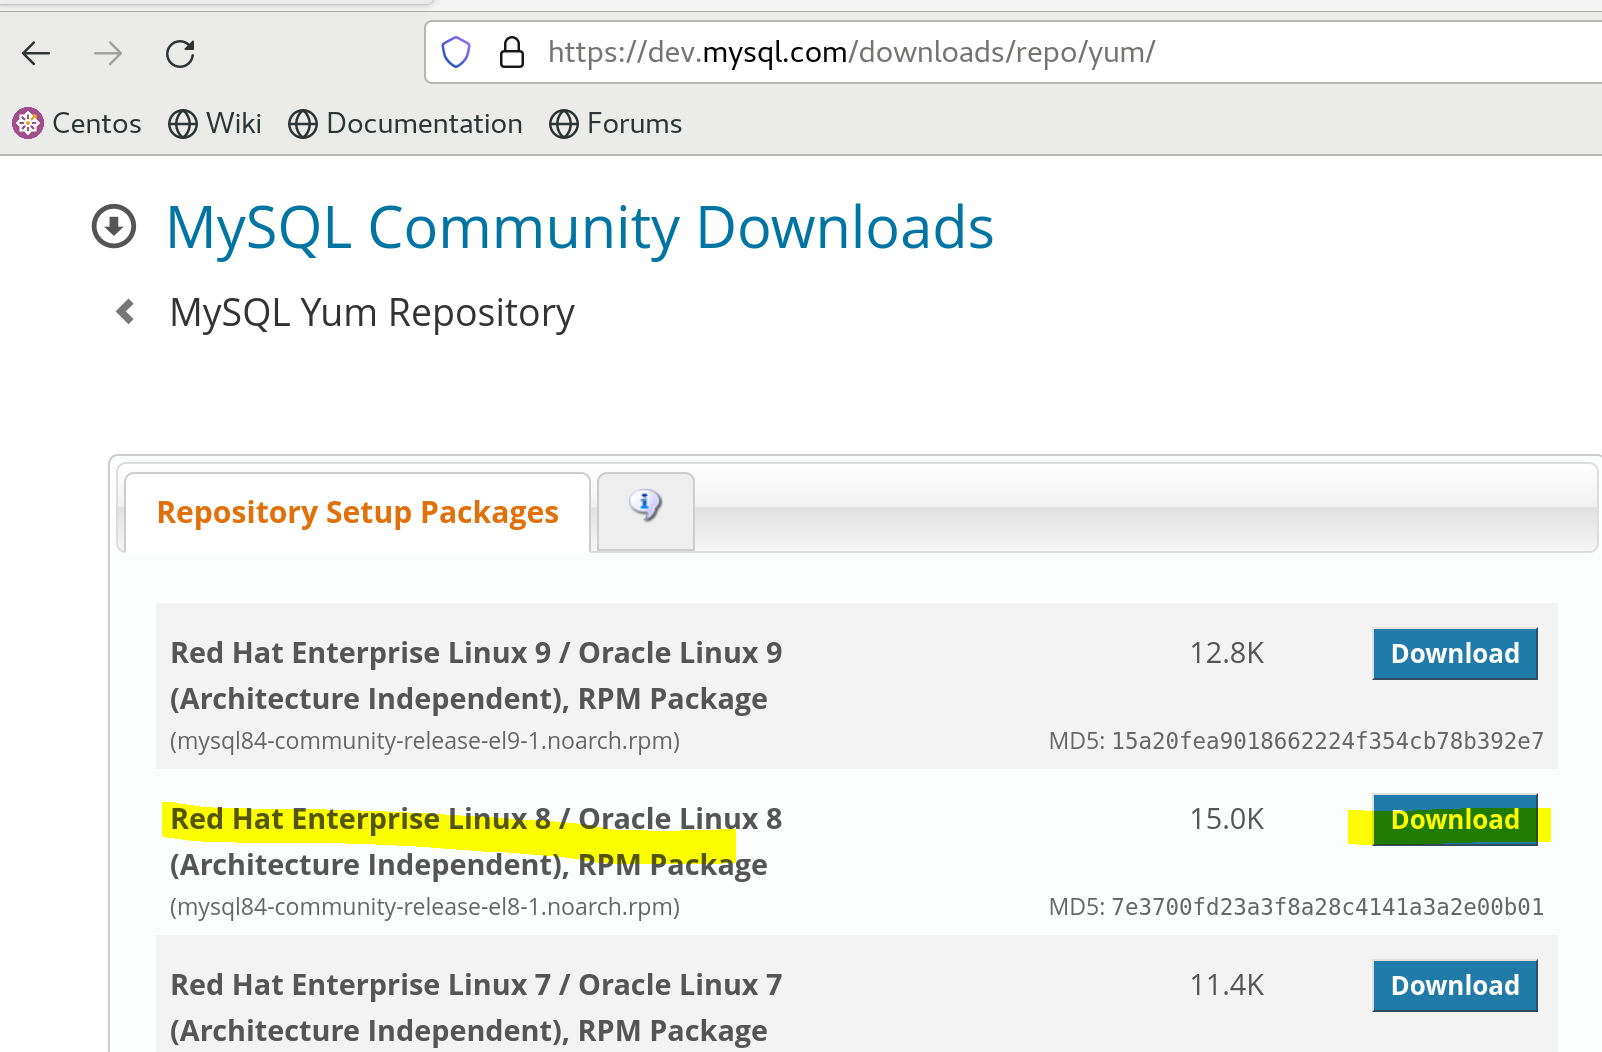

In [ ]:
[mysqluser@mysqlserver Downloads]$ su -
Password: 
[root@mysqlserver ~]# cd /home/mysqluser/Downloads
[root@mysqlserver Downloads]# ls -rtl
total 16
-rwxr-xr-x. 1 mysqluser mysqluser 15364 May 13 14:03 mysql84-community-release-el8-1.noarch.rpm
[root@mysqlserver Downloads]# yum localinstall mysql84-community-release-el8-1.noarch.rpm
CentOS Linux 8 - AppStream                                                   77  B/s |  38  B     00:00    
Error: Failed to download metadata for repo 'appstream': Cannot prepare internal mirrorlist: No URLs in mirrorlist
[root@mysqlserver Downloads]# 

[root@mysqlserver Downloads]# sed -i 's/mirrorlist/#mirrorlist/g' /etc/yum.repos.d/CentOS-*
[root@mysqlserver Downloads]# 
[root@mysqlserver Downloads]# sed -i 's|#baseurl=http://mirror.centos.org|baseurl=http://vault.centos.org|g' 
                              /etc/yum.repos.d/CentOS-*
[root@mysqlserver Downloads]# 


[root@mysqlserver Downloads]# yum localinstall mysql84-community-release-el8-1.noarch.rpm
CentOS Linux 8 - AppStream                                                  4.5 MB/s | 8.4 MB     00:01    
CentOS Linux 8 - BaseOS                                                     4.8 MB/s | 4.6 MB     00:00    
CentOS Linux 8 - Extras                                                      24 kB/s |  10 kB     00:00    
Last metadata expiration check: 0:00:01 ago on Mon 13 May 2024 02:08:17 PM IST.
Dependencies resolved.

Installed:
  mysql84-community-release-el8-1.noarch                                                                    

Complete!
[root@mysqlserver Downloads]# 

In [ ]:

[root@mysqlserver ~]# ls -rtl /etc/yum.repos.d/mysql*
-rw-r--r--. 1 root root 2870 Apr 22 14:58 /etc/yum.repos.d/mysql-community-source.repo
-rw-r--r--. 1 root root 2755 Apr 22 14:58 /etc/yum.repos.d/mysql-community.repo
-rw-r--r--. 1 root root 3070 Apr 22 14:58 /etc/yum.repos.d/mysql-community-debuginfo.repo
[root@mysqlserver ~]# 


check which release is enabled 
===================================================

[root@mysqlserver ~]# yum repolist enabled | grep mysql.*-community
mysql-8.4-lts-community                 MySQL 8.4 LTS Community Server
mysql-connectors-community              MySQL Connectors Community
mysql-tools-8.4-lts-community           MySQL Tools 8.4 LTS Community
[root@mysqlserver ~]# 

[root@mysqlserver ~]# dnf repolist enabled | grep mysql.*-community
mysql-8.4-lts-community                 MySQL 8.4 LTS Community Server
mysql-connectors-community              MySQL Connectors Community
mysql-tools-8.4-lts-community           MySQL Tools 8.4 LTS Community
[root@mysqlserver ~]# 


we want to install mysql 8.0 community edition 
=========================================================

[root@mysqlserver ~]# yum repolist all | grep mysql80
mysql80-community                            MySQL 8.0 Community Server disabled
mysql80-community-debuginfo                  MySQL 8.0 Community Server disabled
mysql80-community-source                     MySQL 8.0 Community Server disabled
[root@mysqlserver ~]# 


disable 8.4 and enable 8.0 using yum or dnf config manager 
=================================================================

[root@mysqlserver ~]# yum-config-manager --disable mysql-8.4-lts-community
[root@mysqlserver ~]# 
[root@mysqlserver ~]# dnf config-manager --enable  mysql80-community
[root@mysqlserver ~]# 


check again enabled repos 
==================================================

[root@mysqlserver ~]# yum repolist enabled | grep mysql
mysql-connectors-community              MySQL Connectors Community
mysql-tools-8.4-lts-community           MySQL Tools 8.4 LTS Community
mysql80-community                       MySQL 8.0 Community Server
[root@mysqlserver ~]# 

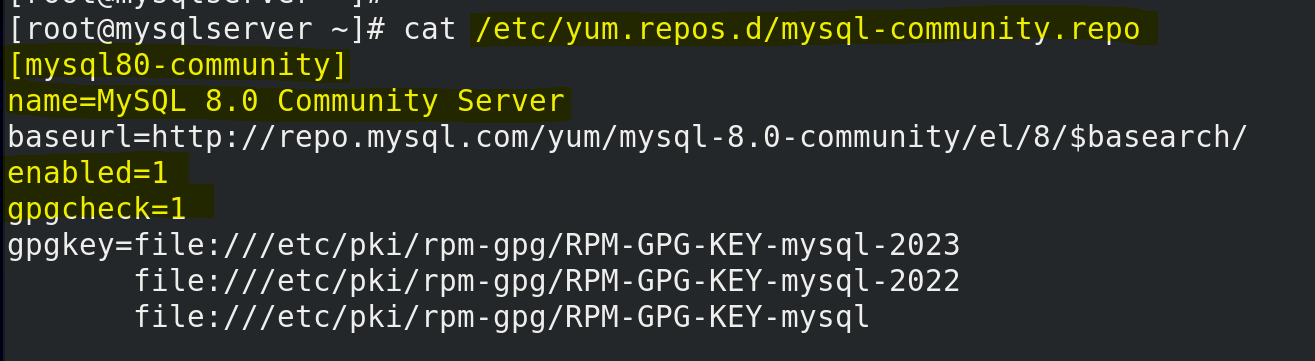

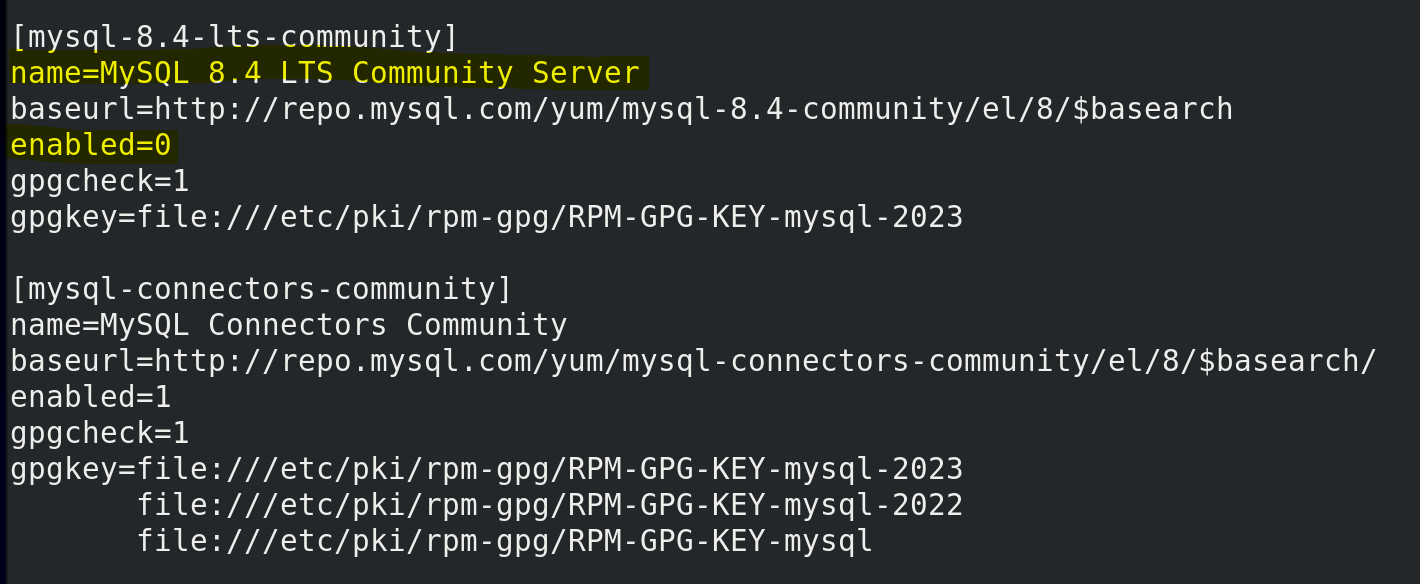

In [ ]:
Insatll MySQL 8.0 community server 
========================================================================

[root@mysqlserver ~]# yum install mysql-community-server
Last metadata expiration check: 0:03:55 ago on Mon 13 May 2024 02:21:44 PM IST.
All matches were filtered out by modular filtering for argument: mysql-community-server
Error: Unable to find a match: mysql-community-server
[root@mysqlserver ~]# 

[root@mysqlserver ~]# yum module disable mysql
Last metadata expiration check: 0:08:04 ago on Mon 13 May 2024 02:21:44 PM IST.
Dependencies resolved.
====================================================================================================================================
 Package                        Architecture                  Version                          Repository                      Size
====================================================================================================================================
Disabling modules:
 mysql                                                                                                                             

Transaction Summary
====================================================================================================================================

Is this ok [y/N]: y
Complete!


[root@mysqlserver ~]# yum install mysql-community-server
Last metadata expiration check: 0:09:19 ago on Mon 13 May 2024 02:21:44 PM IST.
Dependencies resolved.

Installed:
  mysql-community-client-8.0.37-1.el8.x86_64                   mysql-community-client-plugins-8.0.37-1.el8.x86_64                  
  mysql-community-common-8.0.37-1.el8.x86_64                   mysql-community-icu-data-files-8.0.37-1.el8.x86_64                  
  mysql-community-libs-8.0.37-1.el8.x86_64                     mysql-community-server-8.0.37-1.el8.x86_64                          

Complete!
[root@mysqlserver ~]# 

In [ ]:
Start MySql service and enable auto-start 
=========================================================


[root@mysqlserver ~]# systemctl start mysqld
[root@mysqlserver ~]# 
[root@mysqlserver ~]# systemctl status mysqld
● mysqld.service - MySQL Server
   Loaded: loaded (/usr/lib/systemd/system/mysqld.service; enabled; vendor preset: disabled)
   Active: active (running) since Mon 2024-05-13 14:35:00 IST; 10s ago
     Docs: man:mysqld(8)

[root@mysqlserver ~]# systemctl enable mysqld.service
[root@mysqlserver ~]# 

In [ ]:
Change password of root user 
=================================================

[root@mysqlserver ~]# grep 'temporary password' /var/log/mysqld.log
2024-05-13T09:04:55.760082Z 6 [Note] [MY-010454] [Server] A temporary password is generated 
for root@localhost: zE4j6FsoLk#L
[root@mysqlserver ~]# 

[root@mysqlserver ~]# mysql -u root -p
Enter password: 
Welcome to the MySQL monitor.  Commands end with ; or \g.

mysql> select user , host from mysql.user;
ERROR 1820 (HY000): You must reset your password using ALTER USER statement before executing this statement.
mysql> 
mysql> alter user 'root'@'localhost' identified by 'Root@2024';
Query OK, 0 rows affected (0.01 sec)

mysql> select user , host , account_locked from mysql.user;
+------------------+-----------+----------------+
| user             | host      | account_locked |
+------------------+-----------+----------------+
| mysql.infoschema | localhost | Y              |
| mysql.session    | localhost | Y              |
| mysql.sys        | localhost | Y              |
| root             | localhost | N              |
+------------------+-----------+----------------+
4 rows in set (0.00 sec)

In [ ]:
other verifications 
=================================================


process id of mysqld 
============================

[root@mysqlserver ~]# pidof mysqld
40450
[root@mysqlserver ~]# 


mysql running on which port 
=====================================

[root@mysqlserver ~]# netstat -ntlp | grep 3306
tcp6       0      0 :::33060                :::*                    LISTEN      40450/mysqld        
tcp6       0      0 :::3306                 :::*                    LISTEN      40450/mysqld        
[root@mysqlserver ~]# 


list of all open files by a user 
=======================================

[root@mysqlserver ~]# lsof -u mysql
lsof: WARNING: can't stat() fuse.gvfsd-fuse file system /run/user/1000/gvfs
      Output information may be incomplete.
COMMAND   PID  USER   FD      TYPE             DEVICE SIZE/OFF      NODE NAME
mysqld  40450 mysql  cwd       DIR              253,0     4096  69148575 /var/lib/mysql
mysqld  40450 mysql  rtd       DIR              253,0      224       128 /
mysqld  40450 mysql  txt       REG              253,0 65583632   2460697 /usr/sbin/mysqld
mysqld  40450 mysql  mem       REG              253,0    59328  69148547 /usr/lib64/mysql/plugin/
                                                                         component_validate_password.so
mysqld  40450 mysql  DEL       REG               0,18             126980 /[aio]

In [ ]:
MySql Uninstallation 
=================================================

stop mysqld if running 
==============================================

[root@mysqlserver ~]# systemctl stop mysqld
[root@mysqlserver ~]# 
[root@mysqlserver ~]# systemctl status mysqld
● mysqld.service - MySQL Server
   Loaded: loaded (/usr/lib/systemd/system/mysqld.service; enabled; vendor preset: disabled)
   Active: inactive (dead) since Mon 2024-05-13 15:34:27 IST; 8s ago
     Docs: man:mysqld(8)


check for mysql installed packages 
=====================================================

[root@mysqlserver ~]# rpm -qa | grep mysql
mysql-community-server-8.0.37-1.el8.x86_64
mysql-community-libs-8.0.37-1.el8.x86_64
mysql84-community-release-el8-1.noarch
mysql-community-client-8.0.37-1.el8.x86_64
mysql-community-common-8.0.37-1.el8.x86_64
mysql-community-icu-data-files-8.0.37-1.el8.x86_64
mysql-community-client-plugins-8.0.37-1.el8.x86_64
[root@mysqlserver ~]# 


remove mysql packages 
=====================================================

[root@mysqlserver ~]# yum remove mysql-community-server-8.0.37-1.el8.x86_64
Dependencies resolved.

Removed:
  mysql-community-client-8.0.37-1.el8.x86_64                   mysql-community-client-plugins-8.0.37-1.el8.x86_64                  
  mysql-community-common-8.0.37-1.el8.x86_64                   mysql-community-icu-data-files-8.0.37-1.el8.x86_64                  
  mysql-community-libs-8.0.37-1.el8.x86_64                     mysql-community-server-8.0.37-1.el8.x86_64                          

Complete!
[root@mysqlserver ~]# 

[root@mysqlserver ~]# rpm -qa | grep mysql
mysql84-community-release-el8-1.noarch
[root@mysqlserver ~]# 
[root@mysqlserver ~]# yum remove mysql84-community-release-el8-1.noarch
Dependencies resolved.

Removed:
  mysql84-community-release-el8-1.noarch                                                                                            

Complete!
[root@mysqlserver ~]# 


remove mysql user 
========================================

[root@mysqlserver ~]# cat /etc/passwd | grep mysql
mysqluser:x:1000:1000:mysqluser:/home/mysqluser:/bin/bash
mysql:x:27:27:MySQL Server:/var/lib/mysql:/bin/false
[root@mysqlserver ~]# 

[root@mysqlserver ~]# ls -rtl /var/lib/mysql/
total 79296
-rw-r-----. 1 mysql mysql       56 May 13 14:34  auto.cnf
-rw-r-----. 1 mysql mysql  8585216 May 13 14:34 '#ib_16384_1.dblwr'
drwxr-x---. 2 mysql mysql     8192 May 13 14:34  performance_schema

[root@mysqlserver ~]# userdel -r mysql
userdel: mysql mail spool (/var/spool/mail/mysql) not found
[root@mysqlserver ~]# 

[root@mysqlserver ~]# ls -rtl /var/lib/mysql/
ls: cannot access '/var/lib/mysql/': No such file or directory
[root@mysqlserver ~]# 


remove other leftover files 
==================================

[root@mysqlserver ~]# ls -rtl /var/log/mys*
-rw-r-----. 1 27 27 1677 May 13 15:34 /var/log/mysqld.log
[root@mysqlserver ~]# 
[root@mysqlserver ~]# rm -rf /var/log/mysqld.log
[root@mysqlserver ~]# 


Verify other processes
=====================================

[root@mysqlserver ~]# pidof mysqld
[root@mysqlserver ~]# 
[root@mysqlserver ~]# netstat -ntlp | grep 3306
[root@mysqlserver ~]# 
[root@mysqlserver ~]# lsof -u mysql
lsof: can't get UID for mysql
lsof 4.93.2